### Load Model and Inference data

In [15]:
import pandas as pd
import pickle
import numpy as np
import os

In [16]:
import os
import pandas as pd

# Corrected file path for inference data
inference_file_path = "/Users/sumanmukherjee_admin/Desktop/Arpa/DS/physician_conversion_mlops-main/data/output/inference_data.csv"
# Check if the file exists
if os.path.exists(inference_file_path):
    # Load inference data
    df_inference = pd.read_csv(inference_file_path)
    
    # Print shape of inference data
    print(df_inference.shape)
    print('')
    
    # Display the first few rows of inference data
    print(df_inference.head())
else:
    print("File not found at the specified path:", inference_file_path)


(500, 32)

   Unnamed: 0   NPI_ID    HCP_ID  Age  Year_of_Experience  Number_of_Rx  \
0        1966  7552363  HCP_1967   60                  44          1100   
1        1376  4047649  HCP_1377   88                  56          1100   
2         881  5063276   HCP_882   54                  33           175   
3        4226  6628561  HCP_4227   85                  10           730   
4        4917  6186618  HCP_4918   61                  60          1100   

   Rx_last_1_Month  Rx_last_3_Month  Rx_last_6_Month  Rx_last_12_Month  ...  \
0             1297             1926             3288              4463  ...   
1             1786             2959             5062              5420  ...   
2              350              467              564               583  ...   
3             1382             2526             4890              9192  ...   
4             1717             1809             2926              4006  ...   

   Promotional_medscape_last_1_month  Promotional_medscape_last

In [17]:
df_inference.drop(['Unnamed: 0'], axis=1, inplace = True)
df_inference.head()

,NPI_ID,HCP_ID,Age,Year_of_Experience,Number_of_Rx,Rx_last_1_Month,Rx_last_3_Month,Rx_last_6_Month,Rx_last_12_Month,Claims_last_1_Month,...,Promotional_medscape_last_1_month,Promotional_medscape_last_3_month,Promotional_medscape_last_6_month,Promotional_medscape_last_12_month,Sex_ M,Specialty_Oncology,Specialty_Pediatric,Specialty_Uro-oncology,HCO_Affiliation_Type_Contract,HCO_Affiliation_Type_Referral
0,7552363,HCP_1967,60,44,1100,1297,1926,3288,4463,244,...,10,15,25,48,False,False,True,False,False,True
1,4047649,HCP_1377,88,56,1100,1786,2959,5062,5420,97,...,10,19,33,44,True,True,False,False,False,False
2,5063276,HCP_882,54,33,175,350,467,564,583,193,...,20,22,43,75,True,False,False,False,False,False
3,6628561,HCP_4227,85,10,730,1382,2526,4890,9192,37,...,12,15,27,52,True,True,False,False,False,True
4,6186618,HCP_4918,61,60,1100,1717,1809,2926,4006,37,...,14,15,24,45,True,False,False,True,True,False


In [18]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [20]:
import os
import pickle
import xgboost as xgb

# Define the file path for the model
model_path = "/Users/sumanmukherjee_admin/Desktop/Arpa/DS/physician_conversion_mlops-main/data/output/model_file/physician_conversion.pkl"

# Check if the file exists
if os.path.exists(model_path):
    # Load the model
    with open(model_path, "rb") as f:
        conversion_classifier = pickle.load(f)
else:
    print("File not found at the specified path:", model_path)


In [21]:
#id col not to be considered while training
drop_id_col_list = ['NPI_ID', 'HCP_ID']

In [22]:
import pickle

# Load the classifier model from a saved file
with open('/Users/sumanmukherjee_admin/Desktop/Arpa/DS/physician_conversion_mlops-main/data/output/model_file/physician_conversion.pkl', 'rb') as file:
    conversion_classifer = pickle.load(file)


In [23]:
df_inference['Prediction'] = conversion_classifer.predict(df_inference.drop(drop_id_col_list, axis=1))

In [24]:
df_inference['Prediction'].value_counts()

0    371
1    129
Name: Prediction, dtype: int64

### Model Explainibility

In [25]:
#Load Validation Set
import os
import pandas as pd

# Define the file path for the validation data
validation_file_path = "/Users/sumanmukherjee_admin/Desktop/Arpa/DS/physician_conversion_mlops-main/data/output/validation_data.csv"

# Check if the file exists
if os.path.exists(validation_file_path):
    # Load the validation data
    df_validation = pd.read_csv(validation_file_path)
    
    # Print shape of validation data
    print(df_validation.shape)
    print('')
    
    # Display the first few rows of validation data
    print(df_validation.head())
else:
    print("File not found at the specified path:", validation_file_path)


(900, 33)

   Unnamed: 0   NPI_ID    HCP_ID  Age  Year_of_Experience  Number_of_Rx  \
0        1916  6994026  HCP_1917   35                  16           341   
1         196  2715035   HCP_197   77                  10           126   
2        3319  7534912  HCP_3320   90                  45          1100   
3        3466  7645107  HCP_3467   73                  34          1100   
4        2540  4857078  HCP_2541   54                  54          1084   

   Rx_last_1_Month  Rx_last_3_Month  Rx_last_6_Month  Rx_last_12_Month  ...  \
0              425              613              970              1134  ...   
1              140              198              318               539  ...   
2             2103             2536             3920              4988  ...   
3             1243             1552             1881              2937  ...   
4             1456             1565             1804              2256  ...   

   Promotional_medscape_last_3_month  Promotional_medscape_last

In [26]:
df_validation.drop(['Unnamed: 0'], axis=1, inplace = True)
df_validation.head()

,NPI_ID,HCP_ID,Age,Year_of_Experience,Number_of_Rx,Rx_last_1_Month,Rx_last_3_Month,Rx_last_6_Month,Rx_last_12_Month,Claims_last_1_Month,...,Promotional_medscape_last_3_month,Promotional_medscape_last_6_month,Promotional_medscape_last_12_month,Sex_ M,Specialty_Oncology,Specialty_Pediatric,Specialty_Uro-oncology,HCO_Affiliation_Type_Contract,HCO_Affiliation_Type_Referral,TARGET
0,6994026,HCP_1917,35,16,341,425,613,970,1134,24,...,24,37,46,True,False,False,True,False,True,0
1,2715035,HCP_197,77,10,126,140,198,318,539,320,...,7,9,13,False,False,False,False,False,False,0
2,7534912,HCP_3320,90,45,1100,2103,2536,3920,4988,341,...,16,22,25,True,True,False,False,False,False,0
3,7645107,HCP_3467,73,34,1100,1243,1552,1881,2937,316,...,29,35,66,False,False,False,False,False,True,1
4,4857078,HCP_2541,54,54,1084,1456,1565,1804,2256,199,...,21,30,53,False,False,True,False,False,True,1


In [27]:
X_val = df_validation.drop(['NPI_ID', 'HCP_ID','TARGET'], axis=1)
X_val.head()

,Age,Year_of_Experience,Number_of_Rx,Rx_last_1_Month,Rx_last_3_Month,Rx_last_6_Month,Rx_last_12_Month,Claims_last_1_Month,Claims_last_3_Month,Claims_last_6_Month,...,Promotional_medscape_last_1_month,Promotional_medscape_last_3_month,Promotional_medscape_last_6_month,Promotional_medscape_last_12_month,Sex_ M,Specialty_Oncology,Specialty_Pediatric,Specialty_Uro-oncology,HCO_Affiliation_Type_Contract,HCO_Affiliation_Type_Referral
0,35,16,341,425,613,970,1134,24,46,86,...,15,24,37,46,True,False,False,True,False,True
1,77,10,126,140,198,318,539,320,423,687,...,6,7,9,13,False,False,False,False,False,False
2,90,45,1100,2103,2536,3920,4988,341,361,406,...,9,16,22,25,True,True,False,False,False,False
3,73,34,1100,1243,1552,1881,2937,316,322,415,...,15,29,35,66,False,False,False,False,False,True
4,54,54,1084,1456,1565,1804,2256,199,388,496,...,11,21,30,53,False,False,True,False,False,True


In [28]:
X_val = X_val.astype(float)

print(X_val)

      Age  Year_of_Experience  Number_of_Rx  Rx_last_1_Month  Rx_last_3_Month  \
0    35.0                16.0         341.0            425.0            613.0   
1    77.0                10.0         126.0            140.0            198.0   
2    90.0                45.0        1100.0           2103.0           2536.0   
3    73.0                34.0        1100.0           1243.0           1552.0   
4    54.0                54.0        1084.0           1456.0           1565.0   
..    ...                 ...           ...              ...              ...   
895  78.0                46.0        1100.0           1444.0           1590.0   
896  89.0                47.0        1099.0           1832.0           2342.0   
897  91.0                52.0         983.0           1108.0           1252.0   
898  30.0                30.0         412.0            482.0            573.0   
899  60.0                15.0         818.0           1387.0           2721.0   

     Rx_last_6_Month  Rx_la

In [29]:
X_val.columns

Index(['Age', 'Year_of_Experience', 'Number_of_Rx', 'Rx_last_1_Month',
       'Rx_last_3_Month', 'Rx_last_6_Month', 'Rx_last_12_Month',
       'Claims_last_1_Month', 'Claims_last_3_Month', 'Claims_last_6_Month',
       'Claims_last_12_Month', 'Procedures_chemo_last_1_month',
       'Procedures_chemo_last_3_month', 'Procedures_chemo_last_6_month',
       'Procedures_chemo_last_12_month', 'Procedures_radio_last_6_month',
       'Procedures_radio_last_12_month', 'Procedures_Biopsy_last_6_month',
       'Promotional_medscape', 'Promotional_medscape_last_1_month',
       'Promotional_medscape_last_3_month',
       'Promotional_medscape_last_6_month',
       'Promotional_medscape_last_12_month', 'Sex_ M ', 'Specialty_Oncology',
       'Specialty_Pediatric', 'Specialty_Uro-oncology',
       'HCO_Affiliation_Type_Contract', 'HCO_Affiliation_Type_Referral'],
      dtype='object')

In [30]:
X_test = df_inference.drop(['NPI_ID', 'HCP_ID','Prediction'], axis=1)

In [32]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.2/448.2 kB 11.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


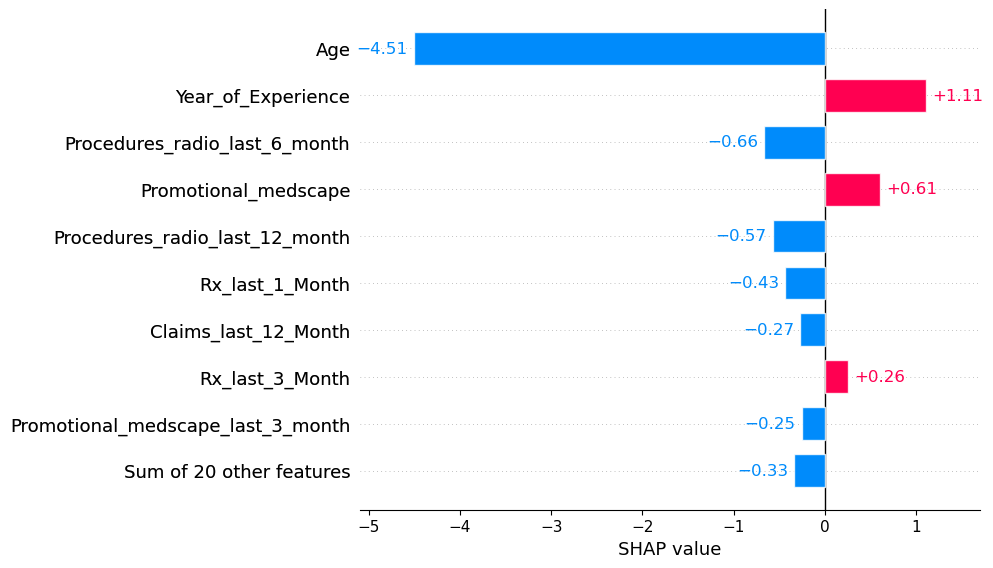

In [33]:
import shap

# Create a SHAP explanation
explainer = shap.Explainer(conversion_classifer, X_val)
shap_values = explainer(X_test)

# Visualize the SHAP explanation
shap.plots.bar(shap_values[1])

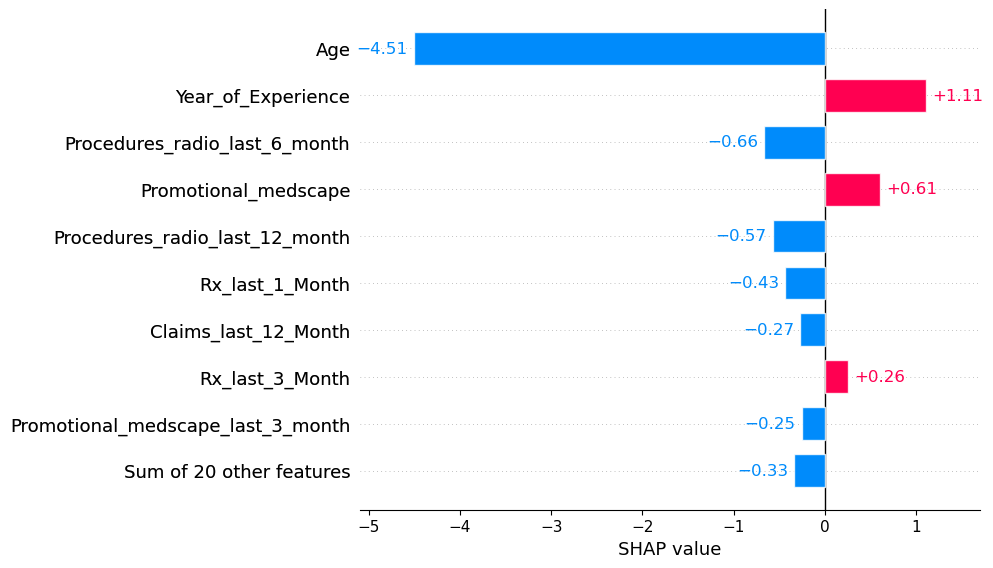

In [34]:
# Visualize the SHAP explanation
shap.plots.bar(shap_values[1])

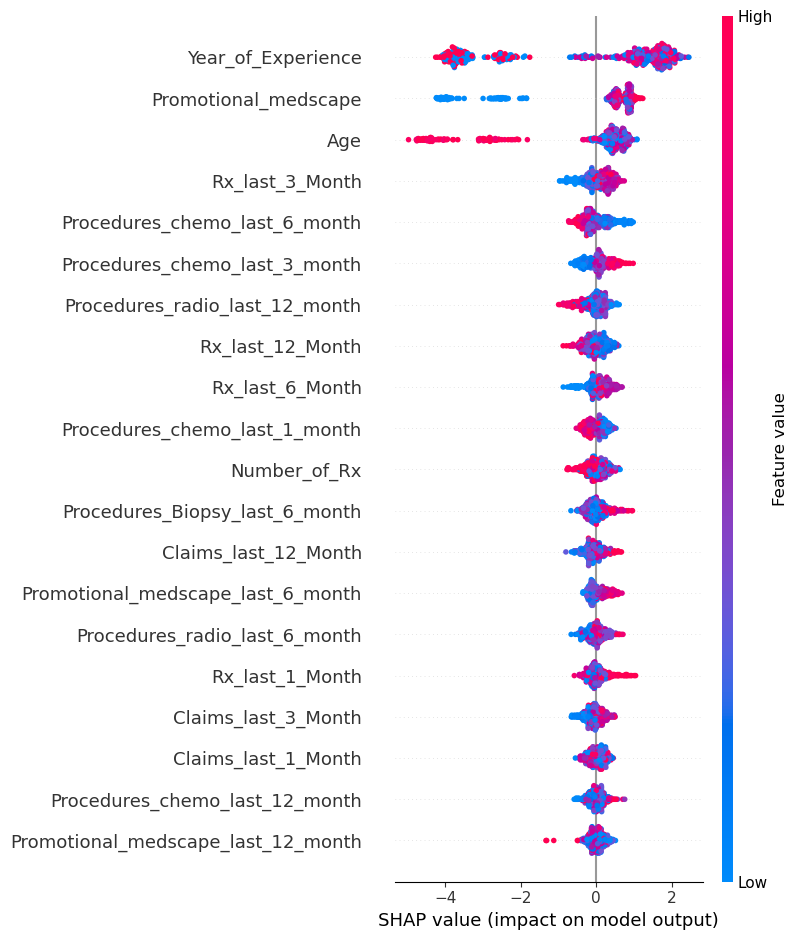

In [35]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

In [36]:
X_val.columns

Index(['Age', 'Year_of_Experience', 'Number_of_Rx', 'Rx_last_1_Month',
       'Rx_last_3_Month', 'Rx_last_6_Month', 'Rx_last_12_Month',
       'Claims_last_1_Month', 'Claims_last_3_Month', 'Claims_last_6_Month',
       'Claims_last_12_Month', 'Procedures_chemo_last_1_month',
       'Procedures_chemo_last_3_month', 'Procedures_chemo_last_6_month',
       'Procedures_chemo_last_12_month', 'Procedures_radio_last_6_month',
       'Procedures_radio_last_12_month', 'Procedures_Biopsy_last_6_month',
       'Promotional_medscape', 'Promotional_medscape_last_1_month',
       'Promotional_medscape_last_3_month',
       'Promotional_medscape_last_6_month',
       'Promotional_medscape_last_12_month', 'Sex_ M ', 'Specialty_Oncology',
       'Specialty_Pediatric', 'Specialty_Uro-oncology',
       'HCO_Affiliation_Type_Contract', 'HCO_Affiliation_Type_Referral'],
      dtype='object')

In [37]:
vals = np.abs(shap_values.values).mean(0)
feature_names = X_val.columns

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
feature_importance.head()

,col_name,feature_importance_vals
1,Year_of_Experience,2.091631
18,Promotional_medscape,1.122710
0,Age,1.100004
4,Rx_last_3_Month,0.270342
13,Procedures_chemo_last_6_month,0.252490


In [38]:
def calculate_top_shap_features(df, id_col_list, model, n):
    # Initialize SHAP explainer
    explainer = shap.Explainer(model)
    
    # Calculate SHAP values for the entire DataFrame
    shap_values = explainer.shap_values(df.drop(id_col_list, axis=1))
    
    # Create a new DataFrame to store the top features for each row
    top_features_df = pd.DataFrame(index=df.index)
    
    # Iterate through rows and extract top n features
    for row_idx in range(len(df)):
        shap_values_row = shap_values[row_idx]
        
        # Get the absolute SHAP values
        abs_shap_values = abs(shap_values_row)
        
        # Get indices of top n features
        top_feature_indices = abs_shap_values.argsort()[-n:][::-1]
        
        # Get corresponding feature names
        top_feature_names = df.drop(id_col_list, axis=1).columns[top_feature_indices]
        
        # Add the id_col_list column values to the new DataFrame
        for col in id_col_list:
            top_features_df.loc[row_idx, col] = df.loc[row_idx, col]
        
        # Add the top feature names to the new DataFrame
        for i in range(n):
            top_features_df.loc[row_idx, f'REASON{i+1}'] = top_feature_names[i]
    
    return top_features_df


In [39]:
# Example usage
# Assuming you have a trained XGBoost model named 'model', a DataFrame named 'data',
# a list of columns not part of the model named 'id_col_list', and the number of features 'n'
df = df_inference.loc[df_inference['Prediction'] == 1.0].reset_index(drop=True)

id_col_list = ['NPI_ID', 'HCP_ID','Prediction']
top_features_df = calculate_top_shap_features(df, id_col_list, conversion_classifer, n=3)



In [40]:
top_features_df

,NPI_ID,HCP_ID,Prediction,REASON1,REASON2,REASON3
0,7552363.0,HCP_1967,1.0,Procedures_chemo_last_6_month,Rx_last_6_Month,Age
1,5128317.0,HCP_2595,1.0,Year_of_Experience,Procedures_chemo_last_6_month,Procedures_chemo_last_3_month
2,2494688.0,HCP_3000,1.0,Year_of_Experience,Age,Claims_last_6_Month
3,7231495.0,HCP_4422,1.0,Year_of_Experience,Age,Procedures_Biopsy_last_6_month
4,4915928.0,HCP_1461,1.0,Year_of_Experience,Procedures_chemo_last_6_month,Age
...,...,...,...,...,...,...
124,9351653.0,HCP_3872,1.0,Year_of_Experience,Procedures_chemo_last_3_month,Age
125,2527204.0,HCP_107,1.0,Year_of_Experience,Claims_last_3_Month,Rx_last_12_Month
126,6912461.0,HCP_4821,1.0,Year_of_Experience,Age,Promotional_medscape
127,8704421.0,HCP_213,1.0,Year_of_Experience,Age,Promotional_medscape


In [41]:
top_features_df['Prediction'].value_counts()

1.0    129
Name: Prediction, dtype: int64